In [71]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sn


In [4]:
df = pd.read_csv('TrainingSet.csv', index_col = 0 )
names=['URLCount','R1Time', 'CrawlIssues', 'WebsitePriority', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
print(df.shape)
df

(132, 41)


,DateReceived,Website,URLCount,R1Time,CrawlIssues,WebReviewDif,WebsitePriority,ErrorCount,R2Time,TeamLeadSBQ,...,IncorrectGuidance,Other?,Was it a PSF?,MXQA_Encoded,TeamLead_Encoded,QM_Encoded,Month_Encoded,DP_Encoded,DualReviewer_Encoded,Batch Status
632,10/18/2021,deerstags.com,17,140,100,5,QM Check Urgent,0,71,0,...,False,0,False,8.0,2.0,6.0,3.0,2.0,21.0,0
621,10/18/2021,mgchemicals.com,194,500,0,4,QM Check Needed,1,190,0,...,False,0,False,34.0,4.0,6.0,3.0,7.0,NaN,0
703,10/26/2021,godogfun.com,30,90,0,1,PSF,0,30,0,...,False,0,True,26.0,3.0,7.0,3.0,8.0,NaN,1
223,11/16/2021,tourit.com,20,120,0,1,PSF,4,70,1,...,False,0,True,29.0,3.0,6.0,2.0,8.0,NaN,1
14,NaT,manicpanic.com,40,139,25,2,None,3,71,0,...,False,0,False,40.0,3.0,1.0,0.0,2.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,10/7/2021,purplepandastore.com,25,120,0,5,QM Check Needed,0,60,0,...,False,0,False,23.0,5.0,6.0,3.0,8.0,NaN,1
913,9/27/2021,logitech.com,151,139,0,2,PSF,2,71,0,...,False,0,True,23.0,5.0,6.0,4.0,8.0,NaN,1
791,9/27/2021,rollplay.com,20,139,100,2,PSF,2,71,0,...,False,0,True,32.0,2.0,8.0,4.0,8.0,NaN,1
29,NaT,aleradetails.com,40,139,25,2,None,3,71,0,...,False,0,False,17.0,6.0,3.0,1.0,6.0,NaN,0


In [5]:
#df.groupby('CrawlIssues').groups
#print(df.groupby('DP_Encoded').groups)
#df.groupby('DualReviewer_Encoded').groups
#df.groupby('TeamLead_Encoded').groups
#df.groupby('Batch Status').groups

# Data bases
Here we will separete the data in differents forms, the first idea it's just take all the data in the DataBase to see the accuary of the prediction's model, after, using the results of the PCA, we will take diferent information and compare each other.

In [6]:
#All the data (without Website, DataRecived ,....)
All_Features = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ', 'Sent', 'Title', 'Brand'
               ,'MFR', 'BC', 'Color', 'Size', 'IPQ'
               ,'UC', 'Model', 'UPC', 'MPN', 'WebExtractionDif'
               ,'SloppyError', 'IncorrectVariant', 'NewEdgeCase', 'IncorrectGuidance', 'Other?'
               ,'Was it a 3?', 'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded'
               ,'DP_Encoded']
#
#it's importante transform somethings into the database

df_normal = pd.read_csv('TrainingSet_2.csv', index_col = 0 )


In [7]:
#Second data
#Using the features that PCA told are the best ones.
features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']

In [8]:
#Third data
#Using the columns we thoung are better with our experience
features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']

In [9]:
#The result we decided evalute, it is 'Batch status'
y_feature = 'Batch Status'

# Split data
Usually the form to divide the data to train and to test, it's 70/30, so...

In [358]:
#Assing the data base
data_base = df_normal
max_attributes = len(list(data_base))
# Testearemos la profundidad de 1 a cantidad de atributos +1
#divido mis datos para entrenar y de prueba, usualmente se hace un 70/30
f_train = data_base[:round(len(data_base)*0.7)] 
f_valid = data_base[round(len(data_base)*0.7):]

In [359]:
#X = f_train['URLCount','R1Time', 'CrawlIssues', 'WebsitePriority', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
# Assign the features: there are 3 differents...
features = features

x = f_train.loc[:,features]
X_test = f_valid.loc[:,features]
y = f_train.loc[:, 'Batch Status']
y_test = f_valid.loc[:, 'Batch Status']

#Transform_To_array
x_array_train = x.to_numpy()
y_array_train = y.to_numpy()

In [360]:
model   = DecisionTreeClassifier(max_depth=15, random_state=6, max_features = 'auto')
model_r   = DecisionTreeClassifier(max_depth=15, max_features = 'auto')


model_2 = DecisionTreeClassifier(max_depth=max_attributes, random_state=42, max_features = 'auto')
model_3 = DecisionTreeClassifier(max_depth=max_attributes, random_state=0)
model_4 = DecisionTreeClassifier(max_depth=max_attributes, random_state=42, max_features = 'auto')

model_V2 = DecisionTreeClassifier(random_state=0, max_features = 'auto')
model_V2_2 = DecisionTreeClassifier(random_state=0)

model_V3 = DecisionTreeClassifier()

#Trining:
model.fit(x_array_train, y_array_train)
model_r.fit(x_array_train, y_array_train)

DecisionTreeClassifier(max_depth=15, max_features='auto')

In [361]:
##Prediction
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score

y_pred = model.predict(X_test)
y_pred_2 = model_r.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Accuracy 2:", metrics.accuracy_score(y_test, y_pred_2))
#cross_val_score(model, X_test, y_test,cv=10)

Accuracy: 0.625
Accuracy 2: 0.625


In [362]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names = features)
export_graphviz(model_r, 'tree.dot', feature_names = features)

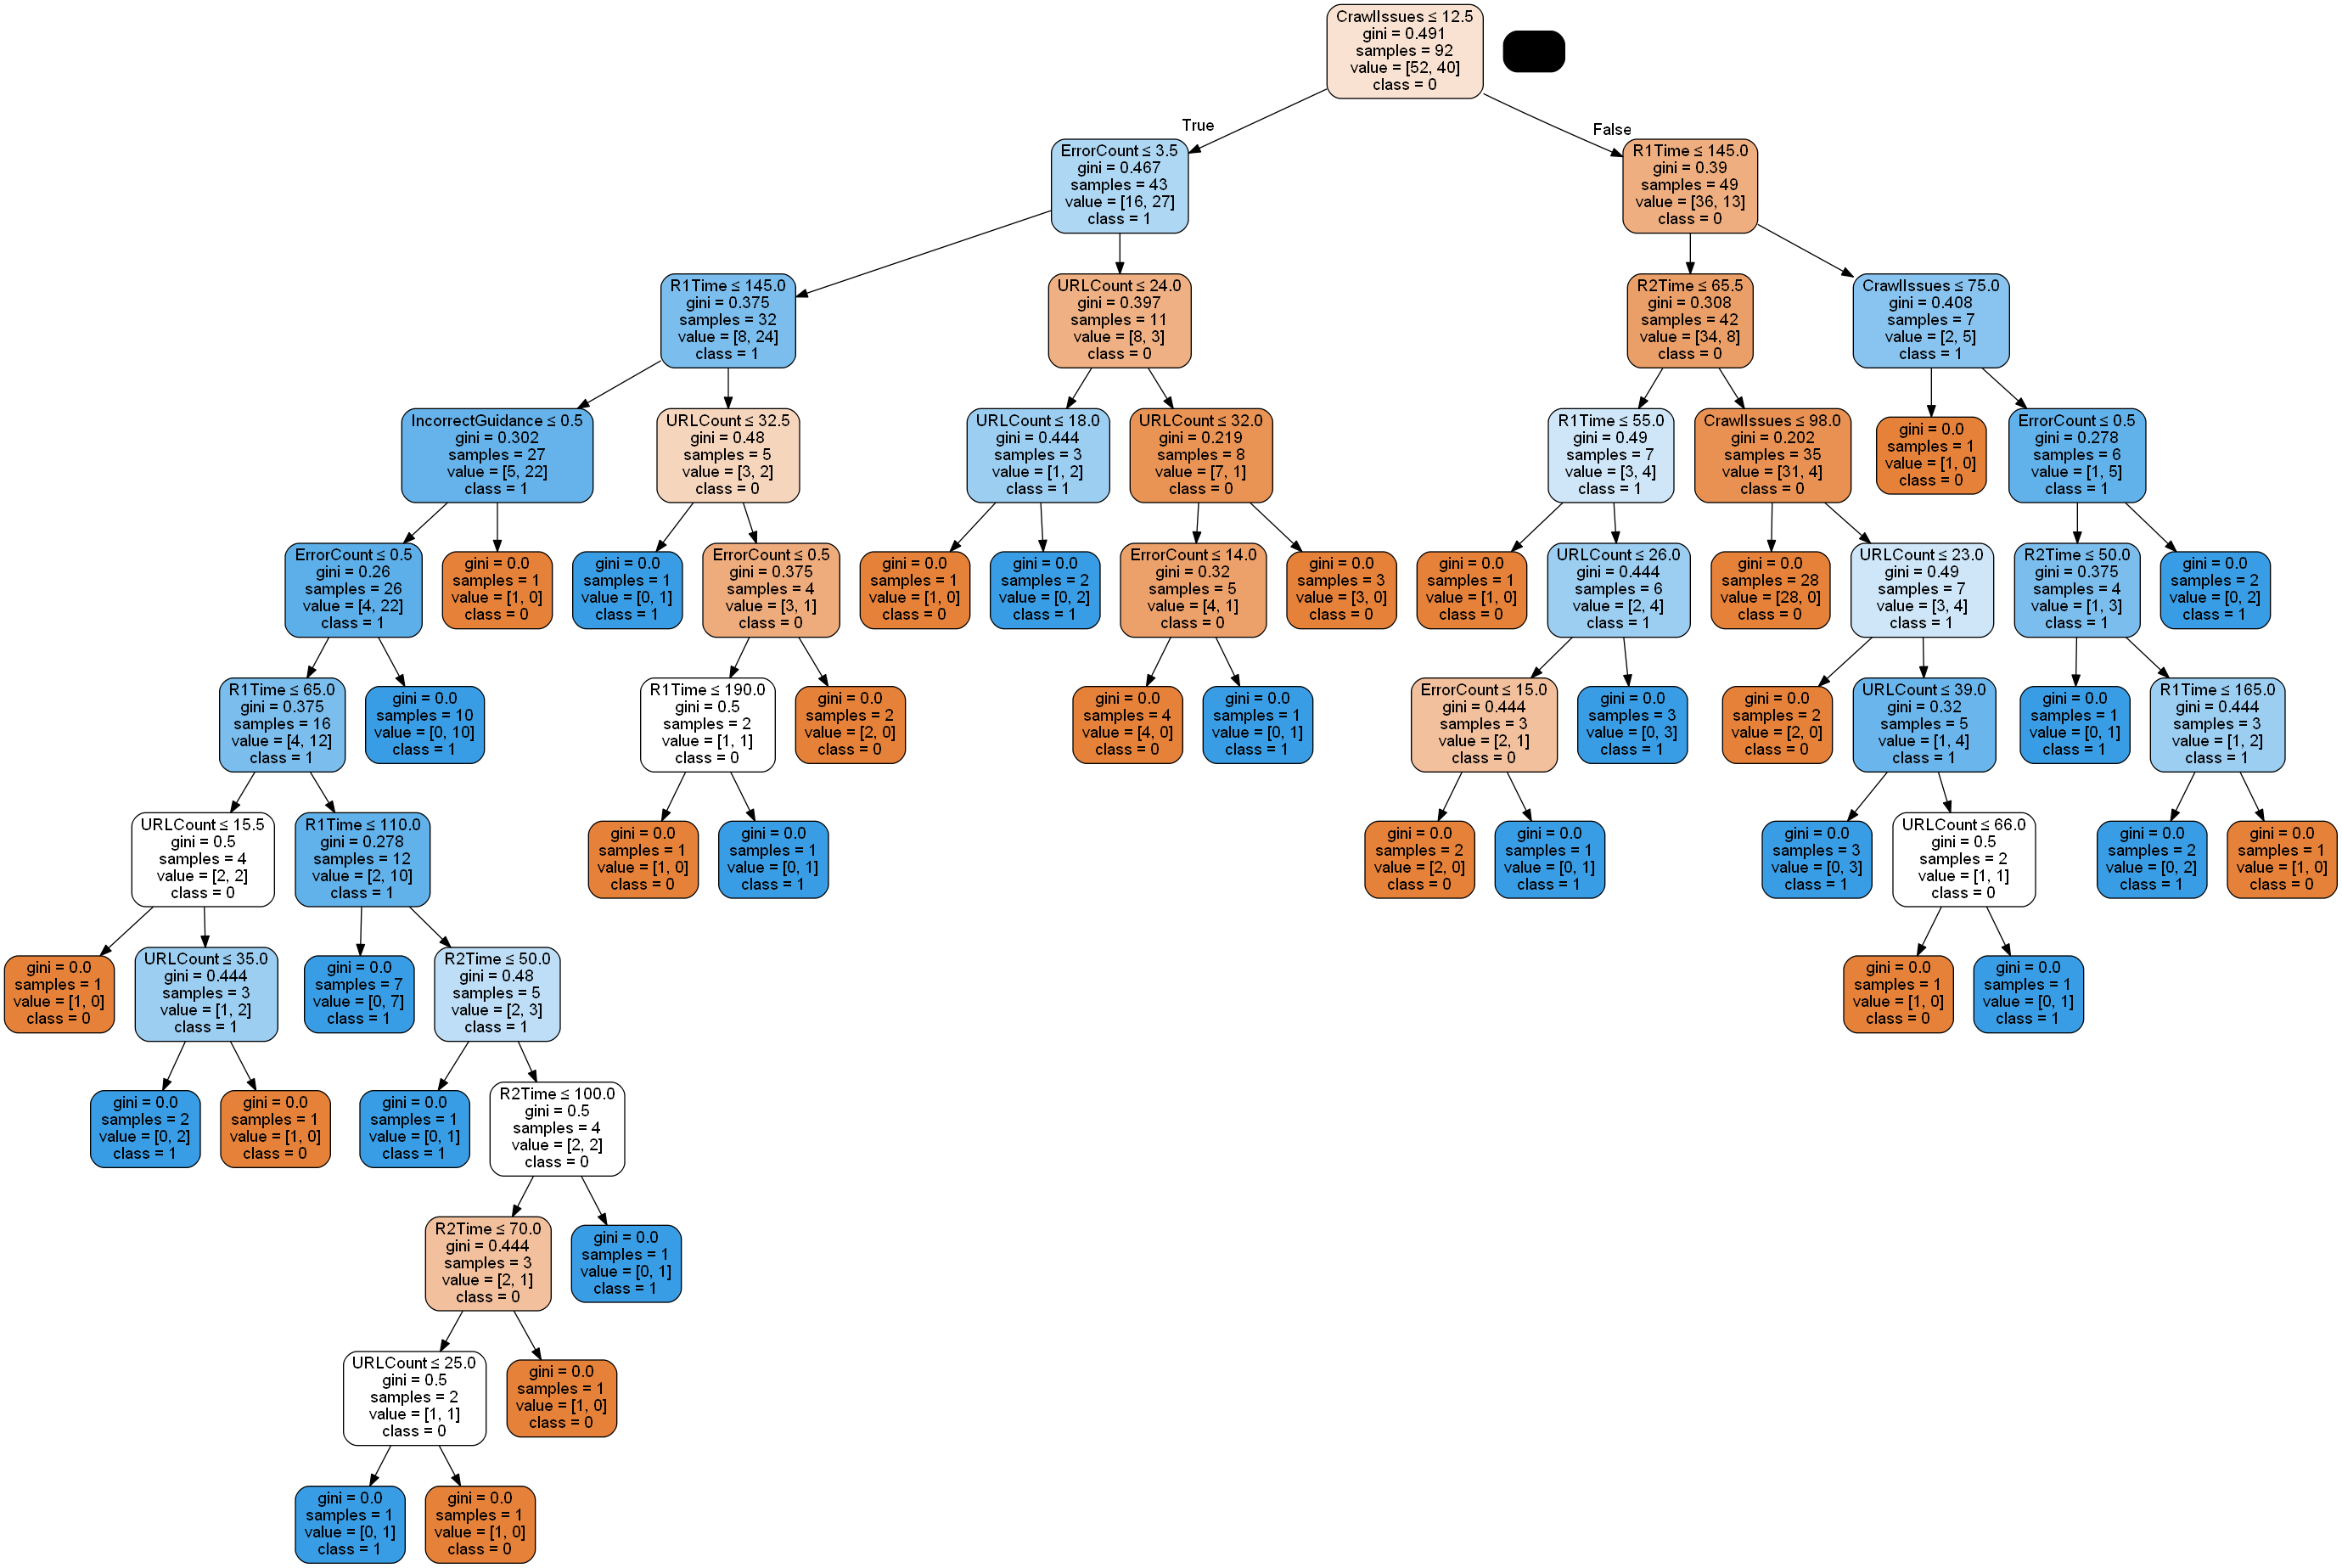

In [363]:
from sklearn.tree import export_graphviz 
from io import StringIO 
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())


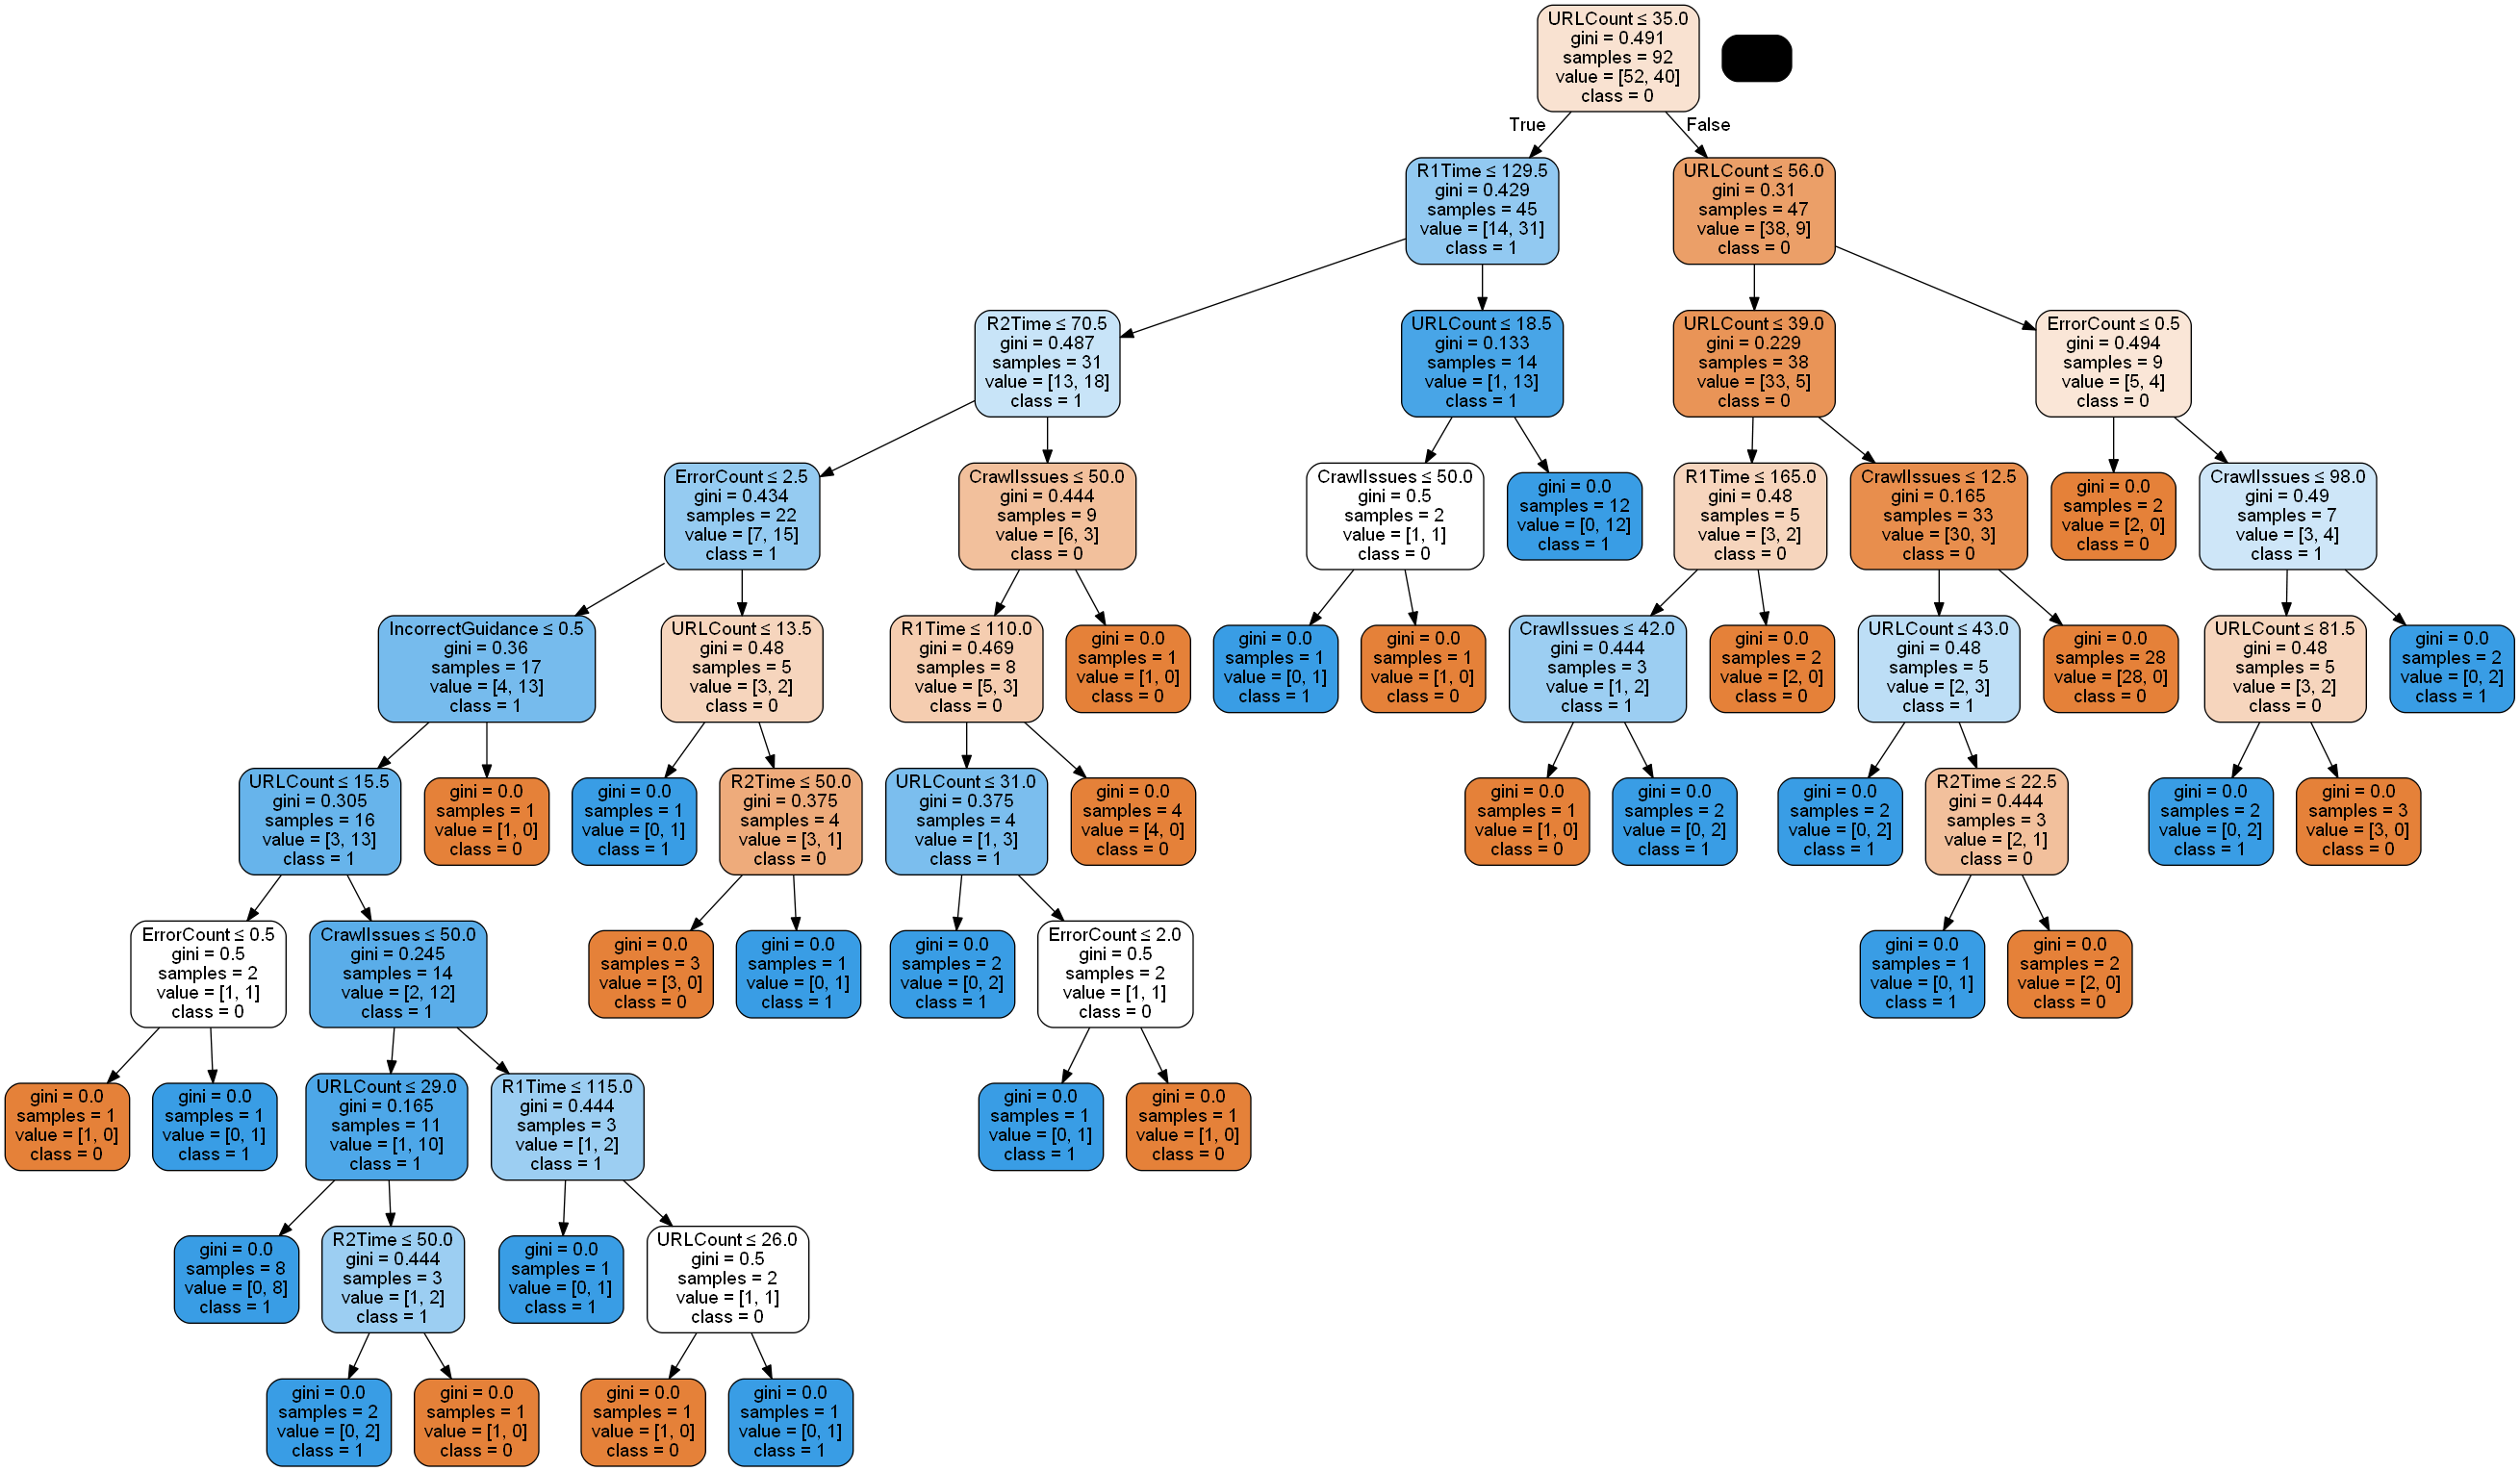

In [364]:
dot_data_2 = StringIO()
export_graphviz(model_r, out_file=dot_data_2,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph_2 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())  
graph_2.write_png('tree_2.png')
Image(graph_2.create_png())

[[ 9  5]
 [10 16]]


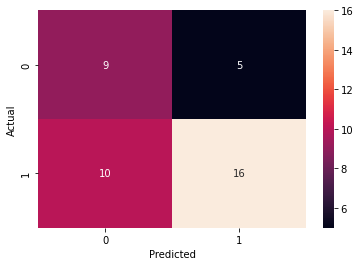

# Modelo Alberto Manuel Sanchez Garcia (Amenaza)
La idea va ser la siguiente, para ti, te estoy dando varios modelos, que haras diferentes comparaciones con los resultados de cada uno de ellos, ofreceras todo tipo de tablas, comparando los resultados, lo importante igual será cuando el profe haga la prueba final, intenta tomar unos Screen para que así agregues en tu reporte en resultado final, cual sería el resultado del modelo que tu propondrás y el general. 

# Modelo Jaiba

# Modelo Roberto Blanco Manzano (Beto pirata)

# Modelo Samuel Abraham Cotera Llanes (Sammy)

# Modelo GENERAL (Otros 2)
Santiago Jesús Damian Magaña

Yahel Andre Balam Avila

Anwar Alejandro Ruiz Peña

# Evaluador de los modelos

In [ ]:
#Accuaracy
#Matriz de confucion
    #https://pypi.org/project/pandas-ml/
    #https://datatofish.com/confusion-matrix-python/
#Precision & recall
    #https://www.askpython.com/python/examples/precision-and-recall-in-python
#F1 Score
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
#Sensivity & spicifity
    #https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/
    #Good information
#ROC curve and AUC
    #https://www.statology.org/plot-roc-curve-python/
    

#----------------------------
#extra
#Informe de clasificacion
    # https://pharos.sh/vision-general-de-los-metodos-de-clasificacion-en-python-con-scikit-learn/

#Probability Calibration curves
    #https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py
    #https://dzone.com/articles/logistic-regression-vs-decision-tree#:~:text=Logistic%20Regression%20assumes%20that%20the%20data%20is%20linearly,not%20sure%2C%20then%20go%20with%20a%20Decision%20Tree.
    #https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py


# Accuaracy
Fonction definition:

In [67]:
def Accuaracy(Y_pred, Y_test):
    print("Accuracy:", metrics.accuracy_score(Y_pred, Y_test))

# Convolution matrix

In [204]:
def Confusion_Matrix(Y_pred, Y_test):
    conf_mat = confusion_matrix(Y_pred, Y_test)
    print('\033[1m' + 'Confusion matrix:' + '\033[0m',"\n",conf_mat)
    print("True negative (TN):  ",conf_mat[0,0])
    print("False positive(FP): ",conf_mat[0,1])
    print("False negative(FN): ",conf_mat[1,0])
    print("True positive (TP):  ",conf_mat[1,1])

    CM = pd.crosstab(Y_pred, Y_test, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(CM, annot=True)
    plt.show()

# Precision & recall

In [172]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def PrecisionAndRecall(Y_pred, Y_test, model, X_Test):
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    print("Precision: ", precision)
    print("Recall: ", recall)
    
    disp = plot_precision_recall_curve(model, X_Test, y_test)

# F1 Score

In [222]:
from sklearn.metrics import f1_score
def F1( Y_pred, Y_test):
    print('\033[1m' + 'F1 : ' + '\033[0m',"\n")
    #Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    f1_macro = f1_score(Y_test, Y_pred, average='macro')
    #Calculate metrics globally by counting the total true positives, false negatives and false positives.
    f1_micro = f1_score(Y_test, Y_pred, average='micro')
    #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
    #This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
    f1_weighted = f1_score(Y_test, Y_pred, average='weighted')
    #General
    f1_general = f1_score(Y_test, Y_pred, zero_division=1)
    #Multi-label
    f1_multi = f1_score(Y_test, Y_pred, average=None)
    #formule basic:
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    F1 = 2 * (precision * recall) / (precision + recall)
    print("F1 Macro:      ", f1_macro)
    print("F1 Micro:      ", f1_micro)
    print("F1 Weighted:   ", f1_weighted)
    print("F1 General:    ", f1_general)
    print("F1 Multi_label:", f1_multi)
    print("F1:            ", F1)

In [217]:
def SensAndSpeci(Y_pred, Y_test):
    print('\033[1m' + 'Sensitivity & Specifity: ' + '\033[0m',"\n")
    cm = confusion_matrix(Y_pred, Y_test)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity1 )
    
    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity1)

In [218]:
def ROCandAUC(Y_pred, Y_test, model, x_test):
    print('\033[1m' + 'ROC & AUC: ' + '\033[0m',"\n")
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    auc = metrics.roc_auc_score(Y_test, Y_pred)
    
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Informe de clasificacion

In [219]:
 from sklearn.metrics import classification_report
def Inform(Y_pred,Y_test):
    print('\033[1m' + 'Classification report:' + '\033[0m',"\n")
    target_names = ['Batch 0', 'class 1']
    print(classification_report(Y_test, Y_pred, target_names=target_names))

# All parameters

In [220]:
def Evaluate(Y_pred, Y_test, model, X_test):
    #Classification report
    Inform(Y_pred, Y_test)
    #Confusion Matrix
    Confusion_Matrix(Y_pred, Y_test)
    #F1
    F1(Y_pred, Y_test)
    #Sensitivity & Specifity
    SensAndSpeci(y_pred, y_test)
    #ROC & AUC
    ROCandAUC(Y_pred, Y_test, model, X_test)
    print("Working...")

Classification report: 

              precision    recall  f1-score   support

     Batch 0       0.47      0.64      0.55        14
     class 1       0.76      0.62      0.68        26

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.61        40
weighted avg       0.66      0.62      0.63        40

Confusion matrix: 
 [[ 9 10]
 [ 5 16]]
True negative (TN):   9
False positive(FP):  10
False negative(FN):  5
True positive (TP):   16


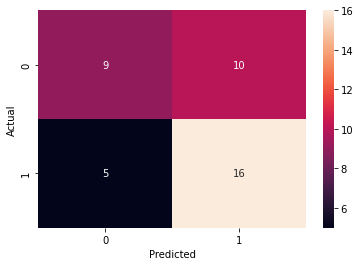

F1 Macro:       0.6131528046421664
F1 Micro:       0.625
F1 Weighted:    0.6334622823984526
F1 General:     0.6808510638297872
F1 Multi_label: [0.54545455 0.68085106]
F1:             0.6808510638297872
Sensitivity & Specifity:  

Sensitivity :  0.47368421052631576
Specificity :  0.7619047619047619
ROC & AUC:  



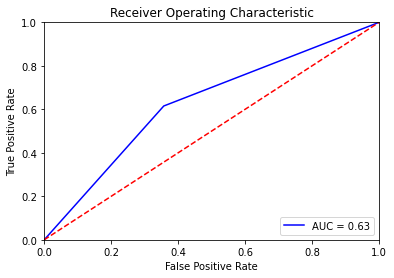

Working...


In [221]:
Evaluate(y_pred, y_test, model, X_test)

In [334]:
#This part is for modificate the database
df = pd.read_csv('TrainingSet.csv')

In [347]:
def Data(Name):
    df = pd.read_csv(Name)
    #Normalize: QM Check Urgent = 0, QM Check Needed = 1, None = 2, PSF = 3 and SF = 4 
    dfc = df.copy()
    
    for i in range(len(df)):
        if dfc['WebsitePriority'][i] == 'QM Check Urgent':
            dfc.loc[i,'WebsitePriority'] = 0
        if dfc['WebsitePriority'][i] == 'QM Check Needed':
            dfc.loc[i,'WebsitePriority'] = 1
        if dfc['WebsitePriority'][i] == 'None':
            dfc.loc[i,'WebsitePriority'] = 2
        if dfc['WebsitePriority'][i] == 'PSF':
            dfc.loc[i,'WebsitePriority'] = 3
        if dfc['WebsitePriority'][i] == 'SF':
            dfc.loc[i,'WebsitePriority'] = 4
    print('Normalizated...')
    New_df = dfc
    return New_df

In [382]:
def CreateModel(Name, mod = 'All'):
    df = Data(Name)
    #All the features but without 'ID', 'DateReceived' 'Website' 'DateSent' and 'TeamLead_Encoded'[because there are empty data]
    #So we took the decision to quit out the component bc we have just 132 data.
    
    All_Features = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ', 'Sent', 'Title', 'Brand'
               ,'MFR', 'BC', 'Color', 'Size', 'IPQ'
               ,'UC', 'Model', 'UPC', 'MPN', 'WebExtractionDif'
               ,'SloppyError', 'IncorrectVariant', 'NewEdgeCase', 'IncorrectGuidance', 'Other?'
               ,'Was it a 3?', 'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded'
               ,'DP_Encoded']
    
    features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
    
    print('Creating model with all the features without ID, DateReceived, Website, DateSent and TeamLead_Encoded...')
    
    # Assigning the data base
    data_base = df
    max_attributes = len(list(data_base))
    # Splip data
    # Usually it is: 70/30
    f_train = data_base[:round(len(data_base)*0.7)] 
    f_valid = data_base[round(len(data_base)*0.7):]
    # 
    
    # We create 3 differents... All_features, with teh data of PCA and a subjetive model(base in our experience).
    features = features
    
    x = f_train.loc[:,features]    
    y = f_train.loc[:, 'Batch Status']
    
    # The function will make his own analysis but also return the model to evaluate others test data.
    X_test = f_valid.loc[:,features]
    y_test = f_valid.loc[:, 'Batch Status']
    
    # Transform_To_array
    x_array_train = x.to_numpy()
    y_array_train = y.to_numpy()
    
    # Model
    model   = DecisionTreeClassifier(max_depth= len(list(features)), random_state=6, max_features = 'auto')
    model_2   = DecisionTreeClassifier(max_depth=len(list(features)), max_features = 'auto')
    model_3   = DecisionTreeClassifier(max_depth=len(list(features)), max_features = 'auto')
    
    # Training:
    model.fit(x_array_train, y_array_train)
    model_2.fit(x_array_train, y_array_train)
    model_3.fit(x_array_train, y_array_train)
    
    # Showing decision tree
    export_graphviz(model, 'tree.dot', feature_names = features)
    export_graphviz(model_r, 'tree.dot', feature_names = features)
    
    #    -----------------First DT----------------------
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('tree.png')
    Image(graph.create_png())
    
    #    -----------------Second DT----------------------
    dot_data_2 = StringIO()
    export_graphviz(model_2, out_file=dot_data_2,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph_2 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())  
    graph_2.write_png('tree_2.png')
    Image(graph_2.create_png())
   
    #    -----------------Third DT----------------------
    dot_data_3 = StringIO()
    export_graphviz(model_3, out_file=dot_data_3,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph_3 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())  
    graph_3.write_png('tree_3.png')
    Image(graph_3.create_png())
    
    # Model Evaluation
    if mod == 'All':
        print('\033[1m' + 'Evaluation 1st model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model, X_test)
        print('\033[1m' + 'Evaluation 2nd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_2, X_test)
        print('\033[1m' + 'Evaluation 3rd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_3, X_test)
    if mod == 'PCA':
        print('\033[1m' + 'Evaluation 2nd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_2, X_test)
    if mod == 'subjetive':
        print('\033[1m' + 'Evaluation 2nd model:' + '\033[0m',"\n")
        Evaluate(y_pred, y_test, model_2, X_test)
    
    print('Working in the model...')
    

Normalizated...
Creating model with all the features without ID, DateReceived, Website, DateSent and TeamLead_Encoded...
Evaluation 2nd model: 

Classification report: 

              precision    recall  f1-score   support

     Batch 0       0.47      0.64      0.55        14
     class 1       0.76      0.62      0.68        26

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.61        40
weighted avg       0.66      0.62      0.63        40

Confusion matrix: 
 [[ 9 10]
 [ 5 16]]
True negative (TN):   9
False positive(FP):  10
False negative(FN):  5
True positive (TP):   16


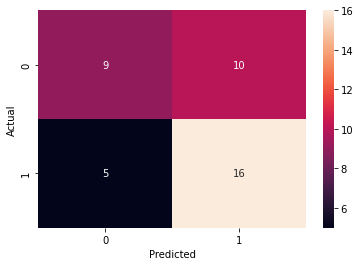

F1 :  

F1 Macro:       0.6131528046421664
F1 Micro:       0.625
F1 Weighted:    0.6334622823984526
F1 General:     0.6808510638297872
F1 Multi_label: [0.54545455 0.68085106]
F1:             0.6808510638297872
Sensitivity & Specifity:  

Sensitivity :  0.47368421052631576
Specificity :  0.7619047619047619
ROC & AUC:  



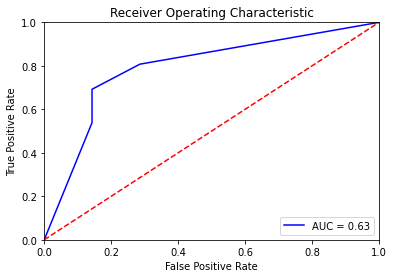

Working...
Working in the model...


In [384]:
CreateModel('TrainingSet.csv', mod = 'subjetive')